In [1]:
#implementing logistic regression 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,f1_score, precision_score, recall_score, confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
from sklearn.datasets import load_digits
data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Without Regularization

In [3]:
log_no_reg = LogisticRegression(solver='lbfgs',penalty='none',multi_class='multinomial',max_iter=100)
log_no_reg.fit(X_train,y_train)
y_pred = log_no_reg.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)))

Accuracy is 0.9583333333333334


### With L1 Regularization

In [4]:
C = 0.001
logreg_l1 = LogisticRegression(C= 1/C,solver='saga',penalty='l1',multi_class='multinomial',max_iter=100)
logreg_l1.fit(X_train,y_train)
y_pred = logreg_l1.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)))

Accuracy is 0.9722222222222222


/home/kalyan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


### With L2 Regularization

In [5]:
C = 0.001
logreg_l2 = LogisticRegression(C= 1/C,solver='saga',penalty='l2',multi_class='multinomial',max_iter=100)
logreg_l2.fit(X_train,y_train)
y_pred = logreg_l2.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)))

Accuracy is 0.9722222222222222


/home/kalyan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


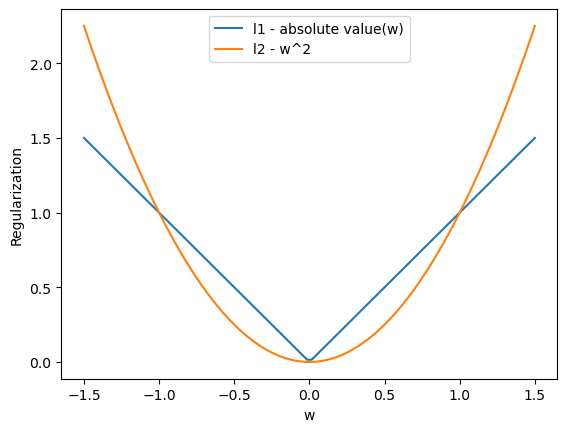

In [18]:
#plotting l1 and l2 regularization for different w values
w = np.linspace(-1.5,1.5,100)
l1 = np.abs(w)
l2 = w**2
plt.plot(w,l1,label='l1 - absolute value(w)')
plt.plot(w,l2,label='l2 - w^2')
plt.xlabel('w')
plt.ylabel('Regularization')
plt.legend()
plt.show()

In [3]:
import optuna
from sklearn.datasets import load_digits
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_digits()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    C = trial.suggest_uniform('C', 0.001, 1.0)
    logreg = LogisticRegression(C= 1/C,solver='saga',penalty='l1',multi_class='multinomial',max_iter=100)
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    return accuracy_score(y_test,y_pred)


In [25]:
study = optuna.create_study(
    storage="sqlite:///Log_Reg.sqlite3",
    study_name="Log_Reg",
    load_if_exists=True,
    direction="maximize",
)

[I 2023-01-31 18:05:02,836] Using an existing study with name 'Log_Reg' instead of creating a new one.


In [26]:
study.optimize(objective, n_trials=100)

/home/kalyan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/home/kalyan/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

[I 2023-01-31 18:05:03,756] Trial 33 finished with value: 0.9722222222222222 and parameters: {'C': 0.8036408375766246}. Best is trial 1 with value: 0.9722222222222222.
/home/kalyan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.

/home/kalyan/miniconda3/lib/python3.7/site-packages/sklearn/linear_mod

In [36]:
optuna.load_study(
    study_name="Log_Reg",
    storage="sqlite:///Log_Reg.sqlite3",
)
import optuna.visualization as opt_viz


fig = optuna.visualization.plot_param_importances(study)
fig.show()